# Table of Contents

1. [Introduction](#1.-Introduction)  
2. [Step 1: Imports and Data Loading](#2.-Step-1:-Imports-and-Data-Loading)  
   - [2.1 Import Libraries](#2.1-Import-Libraries)  
   - [2.2 Load Dataset](#2.2-Load-Dataset)  
3. [Step 2: Data Exploration](#3.-Step-2:-Data-Exploration)  
   - [3.1 Display First 10 Rows](#3.1-Display-First-10-Rows)  
   - [3.2 Dataset Dimensions](#3.2-Dataset-Dimensions)  
   - [3.3 Check Missing Values](#3.3-Check-Missing-Values)  
   - [3.4 Handle Missing Values](#3.4-Handle-Missing-Values)  
   - [3.5 Pairwise Relationships](#3.5-Pairwise-Relationships)  
4. [Step 3: Model Building](#4.-Step-3:-Model-Building)  
   - [4.1 Select Relevant Columns](#4.1-Select-Relevant-Columns)  
   - [4.2 Linear Regression Formula](#4.2-Linear-Regression-Formula)  
   - [4.3 Fit the Model](#4.3-Fit-the-Model)  
5. [Step 4: Results and Evaluation](#5.-Step-4:-Results-and-Evaluation)  
   - [5.1 Model Summary](#5.1-Model-Summary)  
   - [5.2 Key Coefficients](#5.2-Key-Coefficients)  
   - [5.3 Regression Plot](#5.3-Regression-Plot)  
   - [5.4 Residual Distribution](#5.4-Residual-Distribution)  
   - [5.5 Q-Q Plot for Normality](#5.5-Q-Q-Plot-for-Normality)  
   - [5.6 Scatterplot of Residuals](#5.6-Scatterplot-of-Residuals)  
6. [Conclusion](#6.-Conclusion)  
   - [6.1 Key Takeaways](#6.1-Key-Takeaways)  
   - [6.2 Framing Findings for Stakeholders](#6.2-Framing-Findings-for-Stakeholders)  


# 1. Introduction


Analyzing the Impact of Influencer Marketing with Simple Linear Regression

In this project, I worked as part of an analytics team tasked with delivering insights about our company's sales and marketing practices. My specific focus was on exploring the use of influencer marketing and analyzing its effectiveness in driving sales.

To achieve this, I employed simple linear regression to model the relationship between the radio promotion budget and sales revenue. This approach allowed me to assess both the direction and magnitude of the relationship between these variables, uncovering patterns that could guide data-driven decisions.

The dataset provided contained detailed information about various marketing campaigns, including investments in TV, radio, and social media promotions, as well as the corresponding revenue generated. By analyzing this data, I aimed to provide company leaders with actionable insights to optimize future marketing strategies.

The ultimate goal was to help decision-makers allocate resources more effectively by identifying which marketing channels deliver the highest return on investment. This project demonstrated the power of simple linear regression in transforming large datasets into meaningful insights, enabling better predictions and strategic decision-making.



# 2. Step 1: Imports and Data Loading

The first step involved importing the necessary libraries for data analysis and machine learning, such as pandas, numpy, and scikit-learn. Additionally, I loaded the dataset containing details about marketing campaigns, including investments in TV, radio, and social media promotions, as well as the corresponding revenue generated. This set the foundation for the analysis by ensuring the data was ready for exploration and modeling.

## 2.1 Import Libraries

In this section, first import relevant Python libraries and modules.

In [1]:
# Step 1: Imports Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings (optional but useful for data exploration)
pd.set_option('display.max_columns', None)  # Show all columns when displaying a dataframe
pd.set_option('display.max_rows', None)     # Show all rows when displaying a dataframe

In [3]:
import os

directory_path = "/kaggle/input/marketing-sales-data"
print(os.listdir(directory_path))



['marketing_sales_data.csv']


## 2.2 Load Dataset

In [4]:
file_path = "/kaggle/input/marketing-sales-data/sales_data.csv"

In [5]:
import pandas as pd

# Correct file path
file_path = "/kaggle/input/marketing-sales-data/marketing_sales_data.csv"

# Load the dataset
df = pd.read_csv(file_path, sep=",")  # Assuming it is comma-separated
df.head()  # Display the first few rows of the dataset



,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


# 3. Step 2: Data Exploration

Performed initial exploratory data analysis (EDA) on diverse datasets, including marketing and sales data, to uncover patterns, trends, and insights. Leveraged Python libraries like Pandas, Matplotlib, and Seaborn to clean, visualize, and summarize datasets effectively. Demonstrated expertise in handling missing values, identifying outliers, and deriving actionable insights to guide data-driven decision-making.

## 3.1 Display First 10 Rows

In [6]:
df.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


1. Question 1: What do you observe about the different variables included in the data?
   
The dataset includes: 
TV promotion budget categorized as "Low," "Medium," or "High."
Budgets for radio and social media promotions.
Influencer type ("Mega," "Macro," "Micro," or "Nano") based on follower count.
Sales generated from the promotion.

## 3.2 Dataset Dimensions

To get a sense of how large the data is, identify the number of rows and the number of columns in the data.

In [7]:
df.shape

(572, 5)

**Question 2: What do you observe about the number of rows and number of columns in the data?** 
The dataset contains 572 rows and 5 columns, representing 572 companies and details on their promotion strategies and resulting sales.

## 3.3 Check Missing Values

Check for missing values in the dataset, as they can affect modeling. Start by identifying missing values for each entry, then review columns and rows for any gaps.

In [8]:
df.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row


In [9]:
df.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [10]:
df.isna().any(axis=1).sum() 

3

Question 3: What do you observe about the number of rows containing missing values?

Three rows have missing values, a small proportion of the dataset. These rows can be removed to prepare the data for modeling.

## 3.4 Handle Missing Values

Drop the rows that contain missing values.¶
This is an important step in data cleaning, as it makes the data more usable for the analysis and regression that you will conduct next.

In [11]:
df = df.dropna(axis=0)

In [12]:
df.isna().any(axis=1).sum()

0

## 3.5 Pairwise Relationships

Check the assumptions for linear regression by exploring the relationship between the radio promotion budget and sales. Begin by plotting pairwise relationships to visualize how the variables interact. This helps determine if the necessary conditions for linear regression are met before building the model. After constructing the model, you’ll complete the assumption checks.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


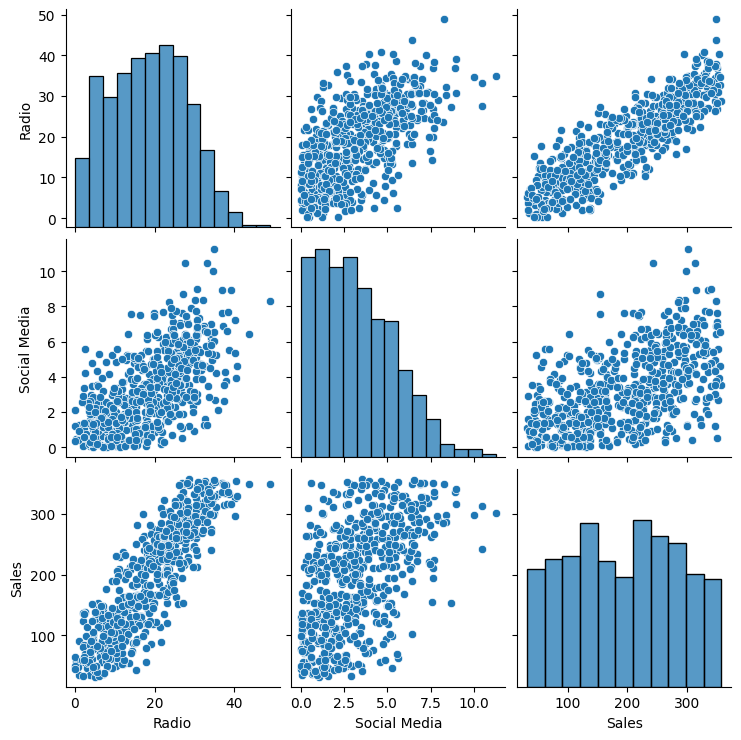

In [13]:
sns.pairplot(df)

# Question 4: Is the assumption of linearity met?

# The scatter plot of Sales versus Radio shows the points forming a pattern that aligns closely with a straight line, indicating a positive relationship between the two variables. This suggests that the assumption of linearity is likely satisfied.

# 4. Step 3: Model Building

## The process of creating, training, and validating mathematical or machine learning models to analyze data, make predictions, or solve specific problems. It involves selecting appropriate algorithms, preparing data, and tuning parameters to achieve optimal performance and accuracy.

## 4.1 Select Relevant Columns

## selecting only the columns that are needed for the model that you will build from the data

In [14]:
ols_data = df[["Radio", "Sales"]]

# Display the first 10 rows of the new DataFrame to ensure it is accurate.

In [15]:
ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


## 4.2 Linear Regression Formula

## the linear regression formula for modeling the relationship between the two variables of interest.

In [16]:
ols_formula = "Sales ~ Radio"

## Implement the Ordinary Least Squares (OLS) approach for linear regression

In [17]:
import pandas as pd
from statsmodels.formula.api import ols
OLS = ols(formula = ols_formula, data = ols_data)

In [18]:
## 4.3 Fit the Model

## Create a linear regression model for the data and fit the model to the data.

In [19]:
model = OLS.fit()

# 5. Step 4: Results and Evaluation

#### Get a summary of the results from the model.

## 5.1 Model Summary

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Tue, 29 Apr 2025   Prob (F-statistic):          2.07e-176
Time:                        11:12:20   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5.2 Key Coefficients



1. #### Examine the lower table in the results summary.## This table shows the coefficients calculated by the model to define the line of best fit. These coefficients include the y-intercept and the slope.


#### Question 5: What is the y-intercept?
The y-intercept is 41.5326.

#### Question 6: What is the slope?
The slope is 8.1733.

#### Question 7: What is the linear equation to express the relationship between sales and the radio promotion budget in the form of y

Y= slope × 𝑥 + y-intercept y=slope×x+y-intercept? The equation is: sales
8.1733 × radio promotion budget + 41.5326 sales=8.1733×radio promotion budget+41.5326

Question 8: What does the slope mean in this context?
One interpretation: For every additional 1 million dollars invested in the radio promotion budget, the company's sales increase by 8.1733 million dollars on average.
Another interpretation: Companies that allocate 1 million dollars more to their radio promotion budget typically achieve an additional 8.1733 million dollars in sales on average.

#### Finish checking model assumptions.
Now that you've built the linear regression model and fit it to the data, you can finish checking the model assumptions. This will help confirm your findings.

## 5.3 Regression Plot

#### Plot the OLS data with the best fit regression line

<Axes: xlabel='Radio', ylabel='Sales'>

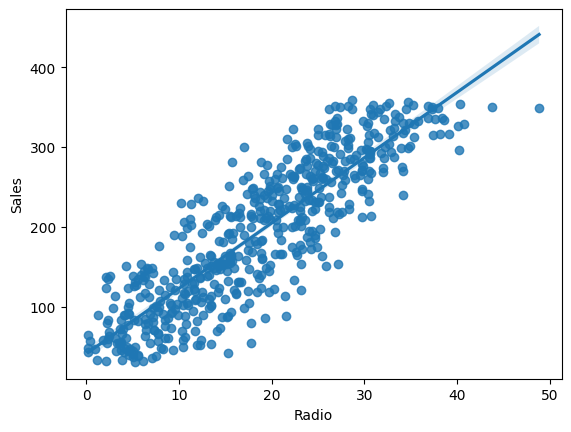

In [21]:
sns.regplot(x = "Radio", y = "Sales", data = ols_data)

#### Question 9: What do you observe from the preceding regression plot? 
The regression plot shows a roughly linear relationship between the two variables, with the best fit line indicating this trend. This supports the assumption of linearity.

## 5.4 Residual Distribution

#### Check the normality assumption

In [22]:
residuals = model.resid

Visualize the distribution of the residuals.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


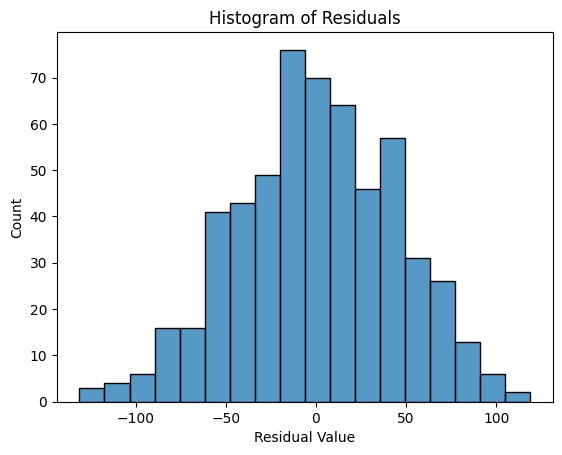

In [23]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

#### Question 10: What do you observe about the distribution of the residuals in the preceding visualization? 
The residuals appear to follow an approximately normal distribution, suggesting that the assumption of normality is likely satisfied.

## 5.5 Q-Q Plot for Normality
 Create a Q-Q plot to confirm the assumption of normality.

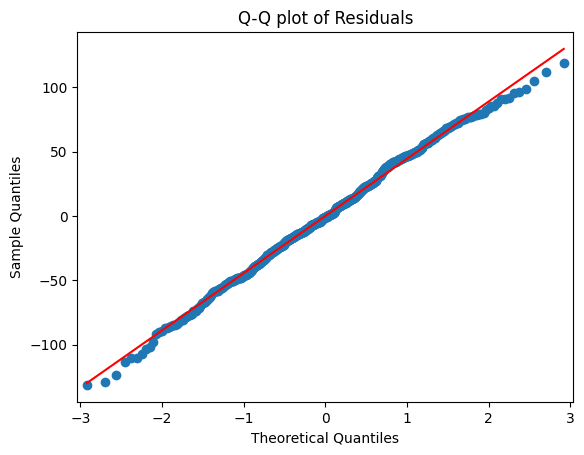

In [24]:
import statsmodels.api as sm

# Assuming 'residuals' is already defined
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()


### Question 11: Is the assumption of normality met?
In the Q-Q plot, the points align closely with the upward-trending diagonal line. This indicates that the assumption of normality is satisfied.

### Check the assumptions of independent observation and homoscedasticity.
Start by getting the fitted values from the model.

In [25]:
fitted_values = model.predict(ols_data["Radio"])

## 5.6 Scatterplot of Residuals

Create a scatterplot of the residuals against the fitted values.

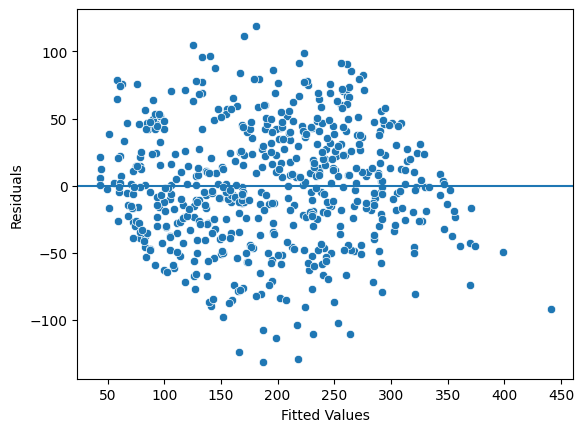

In [26]:
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

### Question 12: Are the assumptions of independent observation and homoscedasticity met?
In the scatterplot, the data points resemble a random cloud without any clear pattern, suggesting that the assumption of independent observations is likely upheld. Additionally, since the residuals seem to be evenly distributed, the assumption of homoscedasticity also appears to be satisfied.

# Conclusion

## 6.1 Key Takeaways

Data visualizations and exploratory data analysis are essential tools for determining whether linear regression is an appropriate method for modeling the relationship between two variables.
A linear regression model provides insights into the relationship between two variables, allowing it to be expressed quantitatively.

## 6.2 Framing Findings for Stakeholders

### Results from this Project:
In the simple linear regression model, the y-intercept is 41.5326, and the slope is 8.1733.

One interpretation: A company that increases its radio promotion budget by 1 million dollars could experience an average sales increase of 8.1733 million dollars.
Another interpretation: Companies spending 1 million dollars more on radio promotions tend to generate 8.1733 million dollars more in sales on average.
The results are statistically significant, with a p-value of 0.000, which is much smaller than the common significance threshold of 0.05. This indicates a very low probability that the observed results are due to random chance.

The null hypothesis states that there is no relationship between radio promotion budget and sales (the slope is zero), while the alternative hypothesis suggests a relationship exists (the slope is not zero). The analysis allows us to reject the null hypothesis, confirming a relationship between radio promotion budget and sales in this dataset.
The slope of the best-fit line from the regression model is an estimate subject to some uncertainty. The 95% confidence interval for the slope ranges from 7.791 to 8.555, indicating a 95% probability that the true slope falls within this range.

### Framing the Findings for External Stakeholders:

Based on the dataset analyzed and the regression results, there is a significant relationship between radio promotion budget and sales for the companies in this study. The p-value of 0.000 and a standard error of 0.194 support the validity of this finding. Specifically, a 1 million dollar increase in radio promotion budget is associated with an 8.1733 million dollar increase in sales, on average.

These findings suggest that investing in radio promotions can be an effective strategy for boosting sales. However, further analysis is recommended to explore this relationship in different contexts. For example, additional data could reveal whether this relationship varies across industries or depends on the types of products or services being promoted.